<h2>Notation</h2>
다음은 여러분이 보게 될 표기법 중 일부를 요약한 것이다.



<img src="2주차_2.png">

<h3>Tools</h3>
이 실습에서는 다음을 활용한다.
<ul>
    <ol>
        <li>NumPy: 과학 컴퓨팅을 위한 인기 라이브러리</li>
        <li>Matplotlib: 데이터 플로팅에 널리 사용되는 라이브러리</li>
    </ol>
<ul>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h2>Problem Statement</h2>
<img src="2주차_2_1.png">
강의에서 마찬가지로 주택 가격 예측의 동기 부여 사례를 사용하게 된다. 이 실습에서는 2개의 데이터 포인트만 있는 간단한 데이터 세트를 사용한다. 즉, 1000평방피트의 주택은 $300000에 판매되고, 2000평방피트의 주택은 $500000에 판매된다.
이 두 포인트가 데이터 또는 훈련 세트를 구성한다. 이 실습에서 크기 단위는 1000평방피트이고 가격 ㅏㄴ위는 1000달러이다.

<table> 
    <tr>
        <td><b>Size(1000sqft)</b></td>
        <td><b>price</b></tb>
    </tr>
    <tr>
        <td>1.0</td>
        <td>300</td>
    </tr>
    <tr>
        <td>2.0</td>
        <td>500</td>
    <tr>
</table>

이 두 점을 통해 선형 회귀모델(위에 파란색 직선으로 표시됨)을 적용하여 다른 주택(예: 1200평방비트의 주택)의 가격을 예측할 수 있다.

다음 코드 셀을 실행하여 <mark>x_train</mark>와 <mark>y_train</mark> 변수를 생성하여라. 데이터는 1차원 NumPy배열에 저장된다.

In [3]:
#x_train is the input variable(size in 1000 square feet)
#y_train is the target (price in 1000s of dollars)
x_train=np.array([1.0,2.0])
y_train=np.array([300.0,500.0])
print(f"x_train={x_train}")
print(f"y_train={y_train}")

x_train=[1. 2.]
y_train=[300. 500.]


<h3>Number of training examples <mark>m</mark></h3>
<ins>학습 예시의 수를 나타내기 위해 'm'을 사용한다.</ins> NumPy배열에는 '.shape'매개변수가 있다.
<mark>x_train.shpae</mark>는 각 차원에 대한 항목이 포함된 Python 튜플을 반환한다. <mark>x_train.shape[0]</mark>은 아래와 같이 배열의 길이와 예제의 개수이다.

In [4]:
#m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m=x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


아래와 같이 Python <mark>len()</mark>함수를 사용할 수도 있다.

In [5]:
m=len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


<h3>Training example: <mark>x_i</mark>, <mark>y_i</mark></h3>
<p><i>i<sup>th</sup></i>훈련 예시를 나타내기 위해 (x<sup>(i)</sup>, y<sup>(i)</sup>)를 사용할 것이다. Python은 0 인덱시이므로 (x<sup>(0)</sup>, y<sup>(0)</sup>)는 (1.0, 300.0)이고 (x<sup(i)</sup>, y<sup>(1)</sup>)은 (2.0, 500.0)이다.</p>
<p>NumPy배열의 값에 액세스 하려면 원하는 오프셋으로 배열을 인덱싱한다. 예를 들어 <mark>x_train</mark>의 위치 0에 액세스하는 구문은 <mark>x_train[0]</mark>이다. <i>i<sup>th</sup></i>훈련 예제를 얻으려면 아래의 다음 코드 블록을 실행하여라.</p>

In [7]:
i=0 # Change this to 1 to see(x^1, y^1)

x_i=x_train[i]
y_i=y_train[i]
print(f"(x^({i}), y^({i})= ({x_i}, {y_i}))")

(x^(0), y^(0)= (1.0, 300.0))


<h3>Plotting the data</h3>
<p>아래 셀에 표시된 것처럼 <mark>matplotlib</mark> 라이브러리의 <mark>scatter()</mark>의 함수를 사용하여 이 두 점을 그릴 수 있다.</p>
<ul>
    <li>함수 인수 <mark>marker</mark> 및 <mark>c</mark>는 점을 빨간색 십자가로 표시한다.</li>
</ul>
<p><mark>matplotlib</mark> 라이브러리의 다른 기능을 사용하여 표시할 제목과 레이블 설정을 할 수 있다.</p>

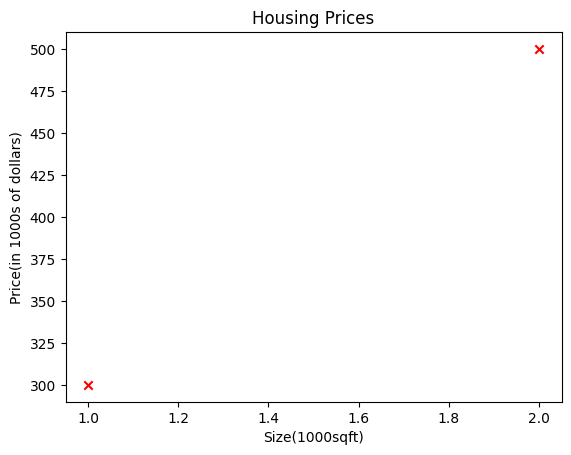

In [8]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')#점: x모양, 색깔: 빨간색

#Set the title
plt.title("Housing Prices")

#Set the y-axis label
plt.ylabel("Price(in 1000s of dollars)")
#Set the x-axis label
plt.xlabel('Size(1000sqft)')
plt.show()

<h3>Model function</h3>
<img src="2주차_2_2.png">
<p>강의에서 설명했듯이 선형회귀에 대한 모델 함수(<mark>x</mark>에서 <mark>y</mark>로 매핑되는 함수)는 다음과 같이 표현된다.</p>
<p><b><i>f<swp>w, b</sub>(x<sup>(i)</sup>)=wx<sup>(i)</sup>+b</i>   (1)</b></p>
<p>위의 공식은 직선을 표현하는 방법이다. <i>w</i>와 <i>b</i>의 값이 다르면 플롯에 다른 직선이 표시된다.</p>
<p>아래 코드 블록을 통해 이에 대한 더 나은 직관을 얻으려고 노력해 보겠다. <i>w=100</i> 및<i>b=100</i>부터 시작하도록 하겠다.</p>
<p><b>Note: 이 셀로 돌아와서 모델의 <i>w</i>및 <i>b</i> 매개변수를 조정할 수 있다.</b></p>

In [9]:
w=100
b=100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


<p>이제 두 데이터 포인트에 대한 <b><i>f<sub>w, b</sub>(x<sup>(i)</sup>)</i></b>값을 계산해 보겠다. 각 데이터 포인트에 대해 다음과 같이 명시적으로 작성할 수 있다.</p>
<p><i>x<sup>(0)</sup></i>의 경우: <mark>f_wb=w*x[0]+b</mark></p>
<p><i>x<sup>(1)</sup></i>의 경우: <mark>f_wb=w*x[1]+b</mark</p>
<p>데이터 포인트 수가 많은 경우 이는 다루기 힘들고 반복적일 수 있다. 따라서 대신 아래 <mark>compute_model_output</mark>함수에 표시된 대로 <mark>for</mark> 루프에서 함수 출력을 계산할 수 있다.</p>
<ul>
    <ol><b>Note: </b>인수 설명 <mark>(ndarray (m, ))</mark>는 모양 (m, )의 NumPy n차원 배열을 설명한다.</ol>
    <ol><mark>(스칼라)</mark>는 차원 없이 크기만 있는 인수를 설명한다.</ol>
    <ol><b><Note:</b> <mark>np.zero()</mark> 는 <i>n</i> 항목이 있는 1차원 numpy 배열을 반환한다.</ol>
</ul>

In [18]:
def compute_model_output(x, w, b):
    '''
    Computes the prediction of a linear model Args:
        x(ndarray (m, )): Data, m examples
        w, b(scalars): model parameters
    Returns
        y(ndarray (m,)): target values
    '''
    m=x.shape[0]
    f_wb=np.zeros(m)
    for i in range(m):
        f_wb[i]=w*x[i]+b
    
    return f_wb

이제 <mark>compute_model_output</mark>함수를 호출하고 출력을 플로팅 해보겠다.

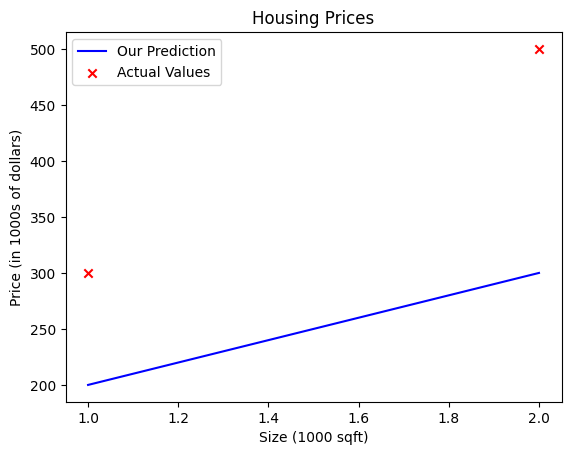

In [19]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

<p>보시다시피 <b><i>w=100</i></b>및 <b><i>b=100</i></b>를 설정해도 데이터에 맞는 선이 아니다.</p>

<h3>Challenge</h3>
<p><b><i>w</i></b> 및 <b><i>b</i></b>의 다양한 값을 실험해 보자. 에디터에맞는 라인의 값은 무엇이어야 하는가?</p>
<h4>Tip: </h4>
<p><i><b>w=200, b=100</b></i>으로 변경해보자</p>
<h3>Prediction</h3>
<p>이제 모델이 있으므로 이를 사용하여 원래의 예측을 할 수 있다. 1200제곱피트의 주택 가격을 예측해 보겠다. <i>x</i>의 단위는 1000sqft이므로 <i>x</i>는 1.2이다.</p>

In [20]:
w=200
b=100
x_i=1.2
cost_1200sqft=w*x_i+b
print(f"${cost_1200sqft: .0f}thousand dollors")

$ 340thousand dollors
